- A supervised machine learning: linear and non linear classification, regression, outlier detection
- can manage high dimensional data
- Finding the optimal hyperplane in N-dimensional space that can separate data points in different groups in the feature space.


# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Data Processing

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# add flower name

df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df.shape

#total dataset =150

(150, 6)

In [9]:
# Set dependent and independent
# only used first 2 features to avoid ugly slicing by using two-dim dataset

X = iris.data[:, :2] #Select the first two features (Sepal Length and Sepal Width)
y = iris.target

In [10]:
# Split Dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Standardize the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM Model

In [12]:
# create svm classifier
svm_classifier = SVC(kernel='linear', C=1)

#Train the SVM model
svm_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

# Evaluation

In [13]:
y_pred= svm_classifier.predict(X_test)

In [14]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7333333333333333


In [15]:
# Generate a classification report

report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.54      0.54      0.54        13
   virginica       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45



In [16]:
# Generate a confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Create a classification table
classification_table = pd.DataFrame(conf_matrix, index=['SETOSA', 'VERSICOLR', 'VIRGINICA'], columns=['SETOSA', 'VERSICOLR', 'VIRGINICA'])
print(classification_table)

           SETOSA  VERSICOLR  VIRGINICA
SETOSA         19          0          0
VERSICOLR       0          7          6
VIRGINICA       0          6          7


<function matplotlib.pyplot.show(close=None, block=None)>

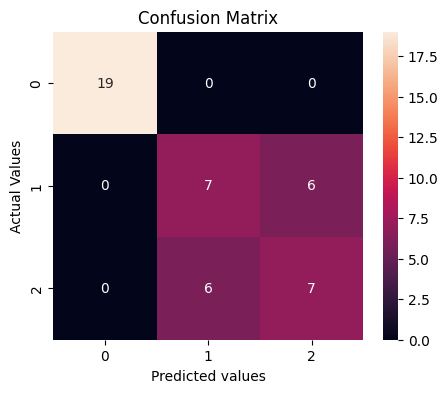

In [17]:
# Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted values")
plt.show

# Visualize Decision Boundary

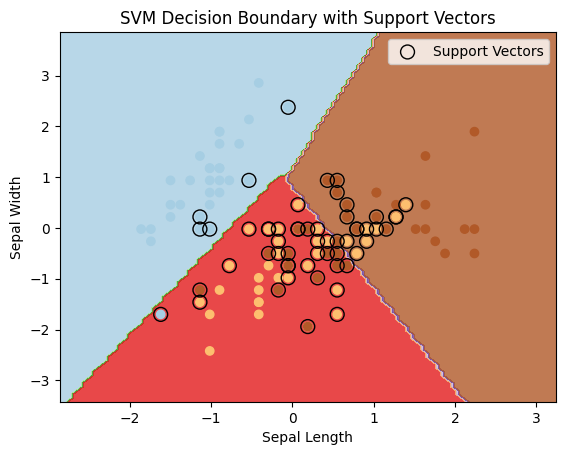

In [18]:
# Create a mesh grid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100),
                     np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 100))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and support vectors
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Decision Boundary with Support Vectors')
plt.legend()
plt.show()

## Pros and Cons SVM
ref: <https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/>

Pros:
-  It works really well with a clear margin of separation.
- It is effective in high-dimensional spaces.
- It is effective in cases where the number of dimensions is greater than the number of samples.
- It uses a subset of the training set in the decision function (called support vectors), so it is also memory efficient.

Cons:
- It doesn’t perform well when we have a large data set because the required training time is higher.
- It also doesn’t perform very well when the data set has more noise, i.e., target classes are overlapping.
- SVM doesn’t directly provide probability estimates; these are calculated using an expensive five-fold cross-validation. It is included in the related SVC method of the Python scikit-learn library.